In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

### Reading Images

In [ ]:
DATASET_PATH='/content/drive/My Drive/CV-Proj/dataset/trainingSet'
TRAINING_DATASET_PATH = os.path.join(DATASET_PATH, 'trainingSet')
os.listdir(TRAINING_DATASET_PATH)

['7', '8', '2', '1', '4', '9', '0', '6', '3', '5']

In [ ]:
images = []
DIRS = os.listdir(TRAINING_DATASET_PATH)

for dir in DIRS:
  dirPath = os.path.join(TRAINING_DATASET_PATH, dir)
  print(dirPath)
  imgsPaths = os.listdir(dirPath)
  for imgPath in imgsPaths:
    imgPath = os.path.join(dirPath, imgPath)
    img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    images.append([img, int(dir)])

/content/drive/My Drive/CV-Proj/dataset/trainingSet/trainingSet/7
/content/drive/My Drive/CV-Proj/dataset/trainingSet/trainingSet/8
/content/drive/My Drive/CV-Proj/dataset/trainingSet/trainingSet/2
/content/drive/My Drive/CV-Proj/dataset/trainingSet/trainingSet/1
/content/drive/My Drive/CV-Proj/dataset/trainingSet/trainingSet/4
/content/drive/My Drive/CV-Proj/dataset/trainingSet/trainingSet/9
/content/drive/My Drive/CV-Proj/dataset/trainingSet/trainingSet/0
/content/drive/My Drive/CV-Proj/dataset/trainingSet/trainingSet/6
/content/drive/My Drive/CV-Proj/dataset/trainingSet/trainingSet/3
/content/drive/My Drive/CV-Proj/dataset/trainingSet/trainingSet/5


In [ ]:
np.random.shuffle(images)
x_train = []
y_train = []
for entry in images:
  x_train.append(entry[0])
  y_train.append(entry[1])

x_train_array = np.array(x_train)
y_train_array = np.array(y_train)
x_train_array.shape



(42010, 28, 28)

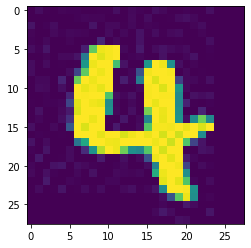

In [ ]:
plt.imshow(x_train_array[1])

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Dropout, Flatten, Dense, MaxPooling2D

In [ ]:
model =keras.Sequential()
# CONV2D > CONV > BN > RELU > MAXPOOLING > DROPOUT
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
# CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
model.add(Conv2D(64, (3, 3)))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
# FLATTEN > DENSE > CLASSIFICATION
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

#### Tensor Board

In [ ]:
root_logdir = os.path.join(os.curdir, "logs/fit/")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                        

In [ ]:
y_train_bin = keras.utils.to_categorical(y_train_array, num_classes=10)

#### Training Model

In [ ]:

history = model.fit(x_train_array, y_train_bin, validation_split=0.1, batch_size=64, epochs=30, verbose=1, callbacks=[tensorboard_cb])

Epoch 1/30
591/591 [==============================] - 9s 12ms/step - loss: 0.1868 - accuracy: 0.9416 - val_loss: 0.0537 - val_accuracy: 0.9833
Epoch 2/30
591/591 [==============================] - 6s 10ms/step - loss: 0.0688 - accuracy: 0.9775 - val_loss: 0.0396 - val_accuracy: 0.9881
Epoch 3/30
591/591 [==============================] - 6s 10ms/step - loss: 0.0508 - accuracy: 0.9839 - val_loss: 0.0353 - val_accuracy: 0.9898
Epoch 4/30
591/591 [==============================] - 6s 10ms/step - loss: 0.0441 - accuracy: 0.9852 - val_loss: 0.0393 - val_accuracy: 0.9883
Epoch 5/30
591/591 [==============================] - 6s 10ms/step - loss: 0.0379 - accuracy: 0.9878 - val_loss: 0.0287 - val_accuracy: 0.9910
Epoch 6/30
591/591 [==============================] - 6s 10ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0333 - val_accuracy: 0.9902
Epoch 7/30
591/591 [==============================] - 6s 10ms/step - loss: 0.0303 - accuracy: 0.9897 - val_loss: 0.0305 - val_accuracy: 0.9921

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 35265), started 0:42:46 ago. (Use '!kill 35265' to kill it.)

<IPython.core.display.Javascript object>

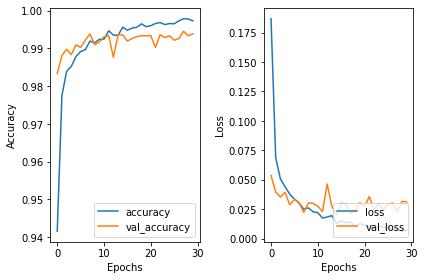

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

## Testing

In [ ]:
TEST_PATH='/content/drive/My Drive/CV-Proj/dataset/testSet'
TEST_DATASET_PATH = os.path.join(TEST_PATH, 'testSet')
TEST_IMAGES_LIST = os.listdir(TEST_DATASET_PATH)

In [ ]:
test_images = []
for imgName in TEST_IMAGES_LIST:
  imgPath = os.path.join(TEST_DATASET_PATH, imgName)
  img = cv2.imread(imgPath, 0)
  img = cv2.resize(img, (28, 28))
  test_images.append(img)
print(len(test_images))  

y_test = np.array(test_images)
y_test.shape

5302


(5302, 28, 28)

In [ ]:
def predict(model, X, imgs):
    correct_pred_count = 0
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'pred_out: {y_pred}')

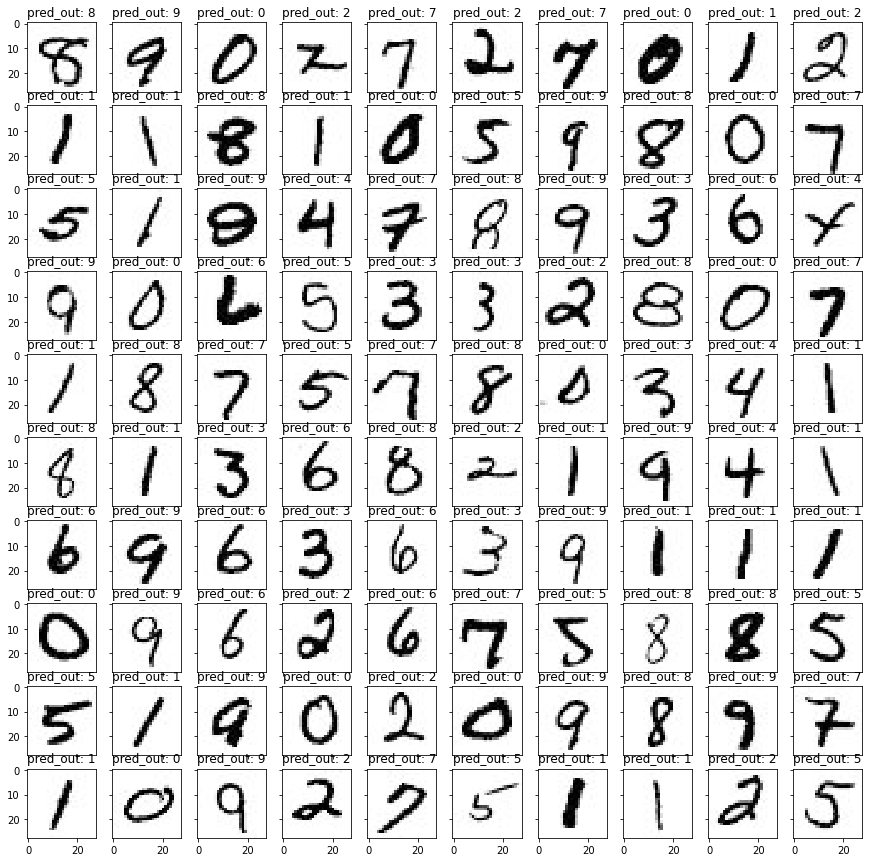

In [ ]:
np.random.shuffle(y_test)
predict(model, y_test, 100)

# Testing & Evaluation


In [ ]:
DATASET_PATH='/content/drive/My Drive/CV-Proj/dataset/trainingSample'
TEST_DATASET_PATH = os.path.join(DATASET_PATH, 'trainingSample')
TEST_DIRS = os.listdir(TEST_DATASET_PATH)
TEST_DIRS, DIRS

(['0', '1', '2', '3', '8', '6', '5', '9', '4', '7'],
 ['7', '8', '2', '1', '4', '9', '0', '6', '3', '5'])

In [ ]:
images = []

for dir in TEST_DIRS:
  dirPath = os.path.join(TEST_DATASET_PATH, dir)
  print(dirPath)
  imgsPaths = os.listdir(dirPath)
  for imgPath in imgsPaths:
    imgPath = os.path.join(dirPath, imgPath)
    img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    images.append([img, int(dir)])

/content/drive/My Drive/CV-Proj/dataset/trainingSample/trainingSample/0
/content/drive/My Drive/CV-Proj/dataset/trainingSample/trainingSample/1
/content/drive/My Drive/CV-Proj/dataset/trainingSample/trainingSample/2
/content/drive/My Drive/CV-Proj/dataset/trainingSample/trainingSample/3
/content/drive/My Drive/CV-Proj/dataset/trainingSample/trainingSample/8
/content/drive/My Drive/CV-Proj/dataset/trainingSample/trainingSample/6
/content/drive/My Drive/CV-Proj/dataset/trainingSample/trainingSample/5
/content/drive/My Drive/CV-Proj/dataset/trainingSample/trainingSample/9
/content/drive/My Drive/CV-Proj/dataset/trainingSample/trainingSample/4
/content/drive/My Drive/CV-Proj/dataset/trainingSample/trainingSample/7


In [ ]:
np.random.shuffle(images)
x_test = []
y_test = []
for entry in images:
  x_test.append(entry[0])
  y_test.append(entry[1])

x_test_array = np.array(x_test)
y_test_array = np.array(y_test)
x_test_array.shape



(600, 28, 28)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

(600, 28, 28)
Confusion matrix, without normalization


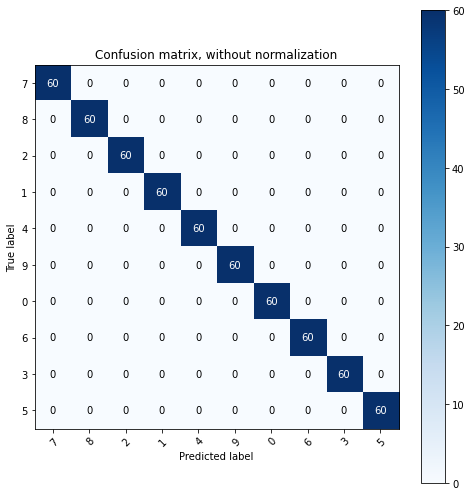

In [ ]:
print(x_test_array.shape)
y_pred=np.argmax(model.predict(x_test_array), axis=-1)
y_true = y_test_array
class_names = DIRS

# # Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')


In [ ]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           7       1.00      1.00      1.00        60
           8       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60
           9       1.00      1.00      1.00        60
           0       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           5       1.00      1.00      1.00        60

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

